In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('UCSD_Basketball_Stats.csv')

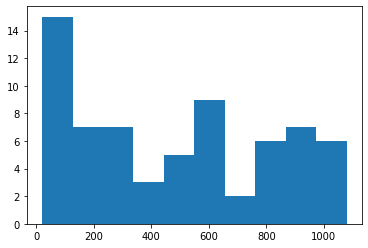

In [3]:
plt.hist(df['MP'])
plt.show()

In [4]:
data = df.sort_values(by='MP', ascending=False)
#data.tail(20)

In [5]:
data = data.drop(columns=['PPG', 'REB/G', 'AST/G'])

In [6]:
columns = data.columns[4:]

In [7]:
columns

Index(['PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%',
       'OREB', 'DREB', 'AST', 'STL', 'BLK'],
      dtype='object')

### Per 36

In [8]:
for column in columns:
    data[column] = data[column]*36/data['MP']

In [9]:
data

,Unnamed: 0,Unnamed: 1,GP,MP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,AST,STL,BLK
18,2018-2019,Christian Bayne,34,1079,16.381835,5.671918,11.443930,0.016682,2.468953,5.772011,0.014347,2.569045,2.769231,0.031029,1.134384,4.337349,3.136237,1.334569,0.266914
55,2015-2016,"DYER, Drew",32,1070,16.620561,5.450467,11.170093,0.016486,3.095327,6.863551,0.015140,2.624299,3.162617,0.027925,1.278505,4.508411,2.220561,0.538318,0.168224
29,2017-2018,"OSHITA, Christian",32,1067,17.544517,5.904405,12.922212,0.015520,2.462980,6.241799,0.013158,3.272727,4.352390,0.025305,1.417057,5.971884,2.125586,0.708529,0.303655
0,2019-2020,"Roberts,Tyrell",31,997,21.448345,7.402207,15.418255,0.017332,4.008024,8.665998,0.016610,2.635908,2.960883,0.032136,0.397192,3.394183,3.502508,1.733200,0.108325
6,2019-2020,"Howell,Mikey",31,988,7.506073,2.514170,4.882591,0.018583,0.874494,1.894737,0.016761,1.603239,2.404858,0.024413,0.473684,3.607287,7.834008,1.639676,0.218623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,2018-2019,Ben Rico,11,44,13.090909,4.909091,17.181818,0.237273,3.272727,11.454545,0.237273,0.000000,0.000000,0.000000,0.000000,5.727273,1.636364,3.272727,0.000000
60,2015-2016,"WALKER, Hunter",2,43,11.720930,3.348837,7.534884,0.368372,0.837209,1.674419,0.418605,4.186047,5.860465,0.594419,1.674419,0.837209,4.186047,1.674419,0.837209
41,2017-2018,"TOMBE, Martin",10,33,0.000000,0.000000,4.363636,0.000000,0.000000,1.090909,0.000000,0.000000,0.000000,0.000000,3.272727,8.727273,0.000000,0.000000,0.000000
14,2019-2020,"Taylor,Lunden",10,31,6.967742,1.161290,4.645161,0.290323,0.000000,1.161290,0.000000,4.645161,6.967742,0.778065,1.161290,4.645161,3.483871,1.161290,0.000000


In [10]:
data = data.set_index('MP')
dataT = data.T

In [11]:
dataT.index

Index(['Unnamed: 0', 'Unnamed: 1', 'GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM',
       '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'AST', 'STL', 'BLK'],
      dtype='object')

In [12]:
dataT = dataT.drop(['Unnamed: 0', 'Unnamed: 1'])

In [13]:
dataT

MP,1079,1070,1067,997,988,981,968,957,946,935,...,64,62,58,48,47,44,43,33,31,21
GP,34,32,32,31,31,31,32,31,30,32,...,16,13,15,12,12,11,2,10,10,4
PTS,16.3818,16.6206,17.5445,21.4483,7.50607,20.0734,15.6942,18.7335,17.2008,17.2492,...,6.75,5.22581,11.7931,7.5,11.4894,13.0909,11.7209,0,6.96774,3.42857
FGM,5.67192,5.45047,5.9044,7.40221,2.51417,7.00917,5.9876,5.7931,6.27907,6.16043,...,2.8125,1.74194,4.96552,2.25,3.06383,4.90909,3.34884,0,1.16129,1.71429
FGA,11.4439,11.1701,12.9222,15.4183,4.88259,14.1284,11.6777,12.1129,12.7104,15.1316,...,8.4375,6.3871,10.5517,7.5,11.4894,17.1818,7.53488,4.36364,4.64516,10.2857
FG%,0.0166821,0.016486,0.0155201,0.017332,0.018583,0.0183486,0.0189669,0.0180564,0.0186469,0.0157861,...,0.185625,0.156774,0.291724,0.225,0.206809,0.237273,0.368372,0,0.290323,0.291429
3PM,2.46895,3.09533,2.46298,4.00802,0.874494,3.59633,0.595041,1.279,0.799154,2.8492,...,0,0.580645,0.62069,0,2.29787,3.27273,0.837209,0,0,0
3PA,5.77201,6.86355,6.2418,8.666,1.89474,8.51376,2.00826,3.46082,1.82664,8.08556,...,1.125,3.48387,3.72414,1.5,6.89362,11.4545,1.67442,1.09091,1.16129,3.42857
3P%,0.0143466,0.0151402,0.0131584,0.0166098,0.0167611,0.0154128,0.011157,0.0139185,0.0167442,0.0134759,...,0,0.0987097,0.105517,0,0.252766,0.237273,0.418605,0,0,0
FTM,2.56905,2.6243,3.27273,2.63591,1.60324,2.45872,3.12397,5.86834,3.84355,2.07914,...,1.125,1.16129,1.24138,3,3.06383,0,4.18605,0,4.64516,0
FTA,2.76923,3.16262,4.35239,2.96088,2.40486,3.59633,5.02066,6.4326,6.1649,2.54118,...,4.5,1.16129,2.48276,3.75,7.65957,0,5.86047,0,6.96774,0


In [14]:
scaled_data = preprocessing.scale(dataT.T)
scaled_data

array([[ 1.08970435,  0.89163445,  0.85830397, ...,  0.61726224,
         0.49253223, -0.35434616],
       [ 0.86190344,  0.93794149,  0.7388553 , ..., -0.0500989 ,
        -0.84722752, -0.59317784],
       [ 0.86190344,  1.11716686,  0.98370497, ..., -0.11931835,
        -0.56083349, -0.26543108],
       ...,
       [-1.64390656, -2.28604766, -2.20107565, ..., -1.66848262,
        -1.75299241, -1.00028585],
       [-1.64390656, -0.93447326, -1.57468654, ...,  0.8706238 ,
         0.20097621, -1.00028585],
       [-2.32730929, -1.62098724, -1.27640601, ...,  2.07972209,
        -1.75299241, -1.00028585]])

In [15]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

In [16]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]

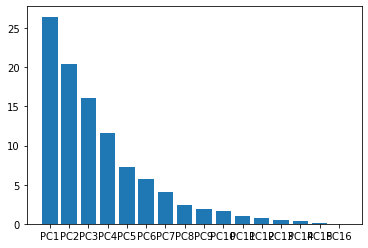

In [17]:
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.show()

In [18]:
index = dataT.index
index

Index(['GP', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA',
       'FT%', 'OREB', 'DREB', 'AST', 'STL', 'BLK'],
      dtype='object')

In [19]:
pca_data.shape

(67, 16)

In [20]:
index1 = [x for x in range(67)]

In [21]:
pca_df = pd.DataFrame(pca_data, index=index1, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,1.839233,-1.079459,-0.299304,0.820300,0.179322,0.237875,0.291790,-0.126176,0.069026,-0.124923,-0.170511,0.261689,0.233308,0.216325,0.055020,3.037813e-17
1,2.114369,-0.966643,-0.071932,0.071490,-0.892504,-0.424131,-0.154271,0.236721,-0.065737,0.016233,-0.053860,0.359049,-0.085750,0.197043,0.030186,-4.278903e-16
2,2.540983,-0.536294,0.981413,0.575320,-0.492776,-0.648345,0.352037,0.404264,-0.117612,-0.037462,-0.228295,0.004945,-0.115193,0.078577,-0.012116,-6.057543e-17
3,3.964757,-0.716068,-1.455037,0.720410,0.400009,0.645551,0.562855,-0.558864,0.115321,-0.347568,0.173533,0.146396,0.221258,-0.168405,0.243173,-6.774375e-16
4,-1.765543,-1.602596,-1.804717,2.978201,0.158523,1.387930,0.981076,0.782895,1.554950,0.652292,0.005619,0.203210,0.049411,-0.026036,-0.083655,-5.082547e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,1.847267,1.927027,-3.377155,-2.773104,3.979837,0.762202,2.183818,0.457271,-0.581855,-0.021271,-0.600522,-0.636707,-0.253216,0.233294,0.013528,-1.019332e-15
63,-1.576946,7.399880,-1.186002,1.229092,0.513450,2.543955,-1.581557,0.099345,-0.267441,1.429081,-0.116600,0.093338,0.412797,0.298606,-0.000335,-9.691989e-17
64,-3.991290,-1.516191,1.498730,-2.930019,-0.708221,-2.262799,1.564880,1.845143,-0.072719,0.237360,0.696952,0.105632,0.491586,0.169055,0.065938,7.869191e-16
65,-2.765895,4.749212,-0.045870,2.694323,-1.600569,-1.876021,0.658784,-1.266673,1.010986,-1.186203,-0.183109,0.345362,-0.126955,-0.072271,0.071077,5.336719e-16


Text(0, 0.5, 'PC2-20.37%')

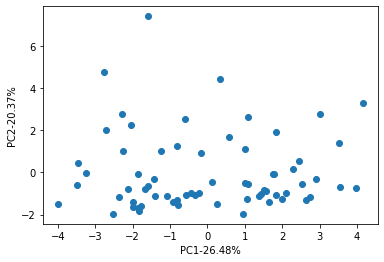

In [22]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('PC1-{0}%'.format(per_var[0]))
plt.ylabel('PC2-{0}%'.format(per_var[1]))

In [23]:
pca.components_[0]

array([ 0.13843613,  0.46750864,  0.43287789,  0.43330659, -0.13224449,
        0.39052228,  0.35254786,  0.02541177,  0.21768673,  0.13703846,
       -0.10574242, -0.09085086,  0.07129733, -0.0321527 , -0.00347608,
       -0.02167164])

In [24]:
loading_scores = pd.Series(pca.components_[0], index=index).abs().sort_values(ascending=False)
loading_scores

PTS     0.467509
FGA     0.433307
FGM     0.432878
3PM     0.390522
3PA     0.352548
FTM     0.217687
GP      0.138436
FTA     0.137038
FG%     0.132244
FT%     0.105742
OREB    0.090851
DREB    0.071297
AST     0.032153
3P%     0.025412
BLK     0.021672
STL     0.003476
dtype: float64

In [26]:
data = pd.read_csv('UCSD_Basketball_Stats.csv')

In [27]:
df1 = data.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'GP', 'MP'])
y = data['MP']
df1

,PTS,PPG,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB/G,AST,AST/G,STL,BLK
0,594,19.16,205,427,0.48,111,240,0.46,73,82,0.89,11,94,3.39,97,3.13,48,3
1,547,17.65,191,385,0.50,98,232,0.42,67,98,0.68,40,164,6.58,53,1.71,18,5
2,205,12.81,72,132,0.55,24,61,0.39,37,39,0.95,28,61,5.56,14,0.88,10,10
3,304,9.81,115,222,0.52,40,115,0.35,34,43,0.79,28,50,2.52,38,1.23,19,13
4,270,8.71,95,206,0.46,63,158,0.40,17,21,0.81,8,44,1.68,33,1.06,18,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,125,4.31,40,105,0.38,14,47,0.30,31,49,0.63,7,61,2.34,40,1.38,21,6
63,125,4.03,42,105,0.40,13,25,0.52,28,41,0.68,7,60,2.16,20,0.65,11,0
64,92,3.83,27,79,0.34,27,79,0.34,11,13,0.85,9,10,0.79,15,0.63,7,0
65,49,1.53,22,59,0.37,0,10,0.00,5,9,0.56,18,41,1.84,8,0.25,2,5


In [28]:
df1 = StandardScaler().fit_transform(df1)

In [29]:
df1

array([[ 2.491562  ,  2.3875106 ,  2.44975873, ...,  1.55512132,
         2.82954884, -0.36253315],
       [ 2.20998259,  2.10293556,  2.20924442, ...,  0.37817245,
         0.36106222, -0.06266005],
       [ 0.16104304,  1.19078775,  0.16487281, ..., -0.30976245,
        -0.29720088,  0.68702271],
       ...,
       [-0.51594576, -0.50158566, -0.60820889, ..., -0.51697176,
        -0.54404954, -0.81234281],
       [-0.77356097, -0.93504433, -0.69410685, ..., -0.83192991,
        -0.95546398, -0.06266005],
       [-0.95329251, -1.0443513 , -0.93462116, ..., -0.9562555 ,
        -0.46176665, -0.06266005]])

In [30]:
pca = PCA()
pca_data = pca.fit_transform(df1)
#principalDf = pd.DataFrame(data = principalComponents
             #, columns = ['principal component 1', 'principal component 2'])

In [31]:
pca.explained_variance_ratio_

array([6.09052870e-01, 1.15870506e-01, 8.13852554e-02, 6.38067311e-02,
       3.70863657e-02, 3.12044352e-02, 1.94934862e-02, 1.41790749e-02,
       9.97025743e-03, 7.55216765e-03, 4.92454662e-03, 2.54556626e-03,
       9.61968636e-04, 8.59425756e-04, 5.70897996e-04, 4.13096684e-04,
       1.23347997e-04, 5.62929468e-34])

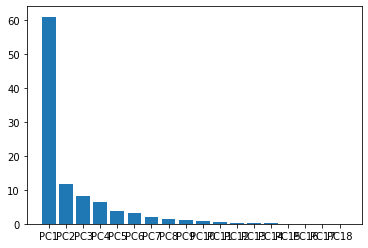

In [32]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=2)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.show()

In [33]:
index = y
pca_df = pd.DataFrame(pca_data, index=index, columns=labels)

In [34]:
data = pd.read_csv('UCSD_Basketball_Stats.csv')
y = data['MP']
x = np.array([])

In [35]:
for index, value in y.items():
    if value >= 800:
        x = np.append(x, '>=800')
    elif (value<800) & (value>=400):
        x = np.append(x, '>=400, <800')
    else:
        x = np.append(x, 'others')

In [36]:
pca_df['MP'] = x

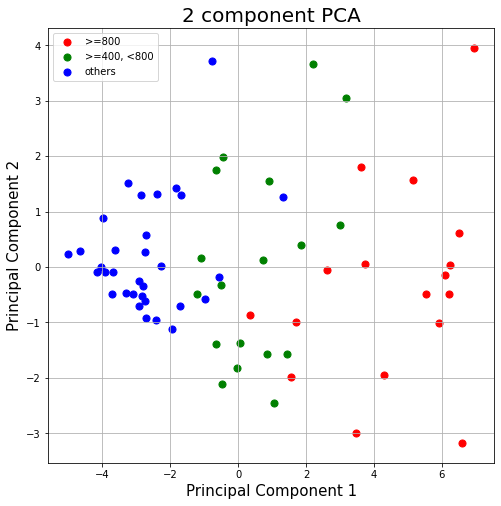

In [37]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['>=800', '>=400, <800', 'others']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['MP'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'PC1']
               , pca_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [38]:
pca.explained_variance_ratio_

array([6.09052870e-01, 1.15870506e-01, 8.13852554e-02, 6.38067311e-02,
       3.70863657e-02, 3.12044352e-02, 1.94934862e-02, 1.41790749e-02,
       9.97025743e-03, 7.55216765e-03, 4.92454662e-03, 2.54556626e-03,
       9.61968636e-04, 8.59425756e-04, 5.70897996e-04, 4.13096684e-04,
       1.23347997e-04, 5.62929468e-34])

In [39]:
index = data.drop(columns=['Unnamed: 0', 'Unnamed: 1', 'GP', 'MP']).columns
loading_scores = pd.Series(pca.components_[0], index=index).abs().sort_values(ascending=False)
loading_scores

PTS      0.294487
FGM      0.293644
FGA      0.289093
DREB     0.278416
PPG      0.273285
FTM      0.269416
FTA      0.268836
REB/G    0.254571
STL      0.229103
3PM      0.228938
3PA      0.226537
AST      0.213495
OREB     0.212606
AST/G    0.198807
BLK      0.163531
FG%      0.163031
3P%      0.151400
FT%      0.137269
dtype: float64

In [42]:
type(loading_scores)

pandas.core.series.Series

<AxesSubplot:>

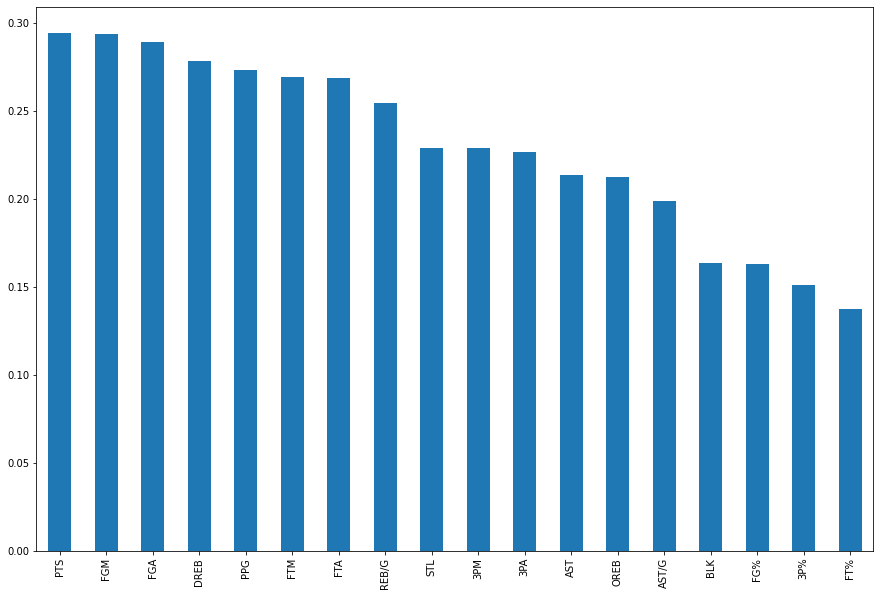

In [45]:
plt.rcParams["figure.figsize"] = (15,10)
loading_scores.plot(kind='bar')